In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
file = 'C:\\Users\\reill\\Downloads\\Traffic_Crashes_-_Crashes.csv'
df = pd.DataFrame(pd.read_csv(file))

In [3]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [4]:
for col in df:
    print(str(col) + ' is ' + str((df[col].isna().sum() / len(df[col])) * 100) + '% NaN')

CRASH_RECORD_ID is 0.0% NaN
CRASH_DATE_EST_I is 92.50197495207281% NaN
CRASH_DATE is 0.0% NaN
POSTED_SPEED_LIMIT is 0.0% NaN
TRAFFIC_CONTROL_DEVICE is 0.0% NaN
DEVICE_CONDITION is 0.0% NaN
WEATHER_CONDITION is 0.0% NaN
LIGHTING_CONDITION is 0.0% NaN
FIRST_CRASH_TYPE is 0.0% NaN
TRAFFICWAY_TYPE is 0.0% NaN
LANE_CNT is 74.96641323544951% NaN
ALIGNMENT is 0.0% NaN
ROADWAY_SURFACE_COND is 0.0% NaN
ROAD_DEFECT is 0.0% NaN
REPORT_TYPE is 2.9256965165367643% NaN
CRASH_TYPE is 0.0% NaN
INTERSECTION_RELATED_I is 77.07860560836072% NaN
NOT_RIGHT_OF_WAY_I is 95.37999587398548% NaN
HIT_AND_RUN_I is 68.72455834033582% NaN
DAMAGE is 0.0% NaN
DATE_POLICE_NOTIFIED is 0.0% NaN
PRIM_CONTRIBUTORY_CAUSE is 0.0% NaN
SEC_CONTRIBUTORY_CAUSE is 0.0% NaN
STREET_NO is 0.0% NaN
STREET_DIRECTION is 0.0005031725026290764% NaN
STREET_NAME is 0.0001257931256572691% NaN
BEAT_OF_OCCURRENCE is 0.0006289656282863454% NaN
PHOTOS_TAKEN_I is 98.69539949380847% NaN
STATEMENTS_TAKEN_I is 97.79145009283533% NaN
DOORING_I is 9

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

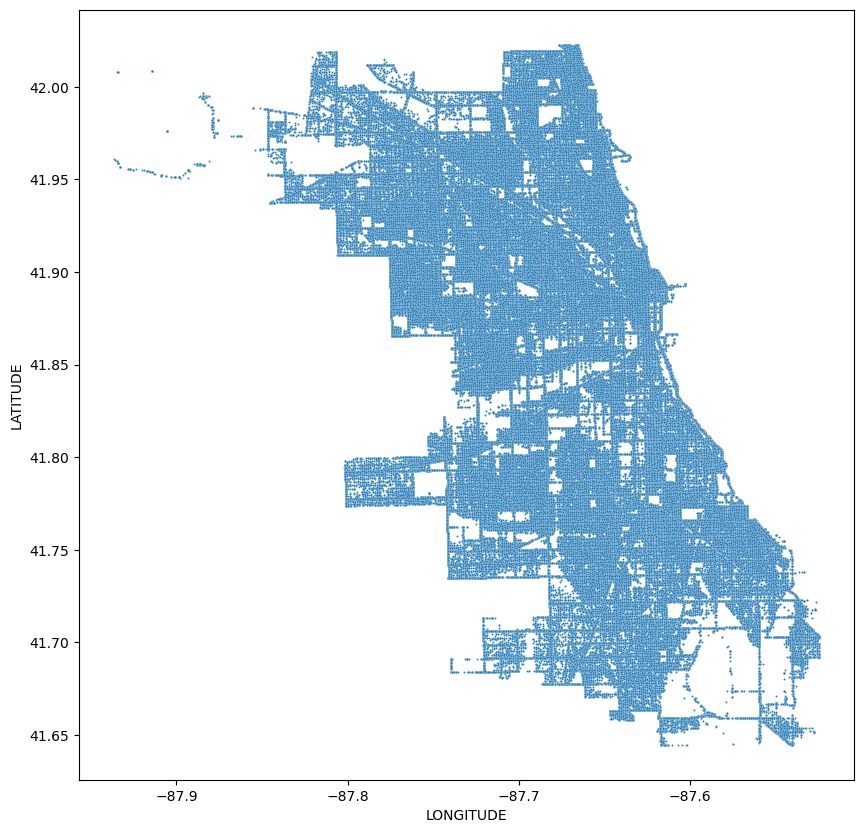

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df[df['LONGITUDE']!=0], x='LONGITUDE', y='LATITUDE', s=2)

In [6]:
print(f"{len(df[df['LATITUDE'] == 0])} out of {len(df['LATITUDE'])} rows are missing coordinates")

48 out of 794956 rows are missing coordinates


In [23]:
#Drop high NaN count columns
dropcols = []
for col in df:
    if (df[col].isna().sum() / len(df[col])) > 0.6:
        dropcols.append(col)
df.drop(dropcols, axis='columns', inplace=True)

In [24]:
#Drop unnecessary columns
df.drop(['CRASH_RECORD_ID', 'REPORT_TYPE', 'DATE_POLICE_NOTIFIED', 'LOCATION'], axis='columns', inplace=True)

In [25]:
df.replace('UNKNOWN', np.nan, inplace=True)

In [26]:
df = df.dropna(axis='index').reset_index(drop=True)

In [11]:
df.describe()

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,614500.000000,614500.000000,614500.000000,614500.000000,614500.000000,614500.000000,614500.000000,614500.000000,614500.000000,614500.000000,614500.0,614500.000000,614500.000000,614500.000000,614500.000000,614500.000000
mean,28.465842,3688.443644,1232.662215,2.039917,0.200421,0.001266,0.021424,0.113404,0.064327,2.032710,0.0,13.144845,4.126836,6.789642,41.853508,-87.673551
std,6.081584,2842.713329,700.601823,0.463292,0.580233,0.038630,0.171960,0.433031,0.326583,1.174149,0.0,5.494901,1.971450,3.389960,0.344261,0.700973
min,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,1246.000000,715.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781671,-87.721960
50%,30.000000,3201.000000,1134.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874003,-87.674322
75%,30.000000,5600.000000,1814.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.922458,-87.633359
max,99.000000,13799.000000,2535.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [12]:
categorical = ['TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY']
#Removed street name and direction

In [13]:
numerical = ['POSTED_SPEED_LIMIT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE']

#This leaves out the datetime column

In [14]:
from datetime import datetime

In [27]:
#Convert the string dates into datetime objects
df['CRASH_DATE'] = df['CRASH_DATE'].map(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))

In [16]:
df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902
1,2023-08-13 10:10:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,4.0,0.0,10,1,8,41.975853,-87.709134
2,2023-08-09 19:55:00,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,0.0,5.0,0.0,0.0,0.0,19,4,8,41.758246,-87.626522
3,2023-09-06 18:45:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,2.0,0.0,18,4,9,41.921730,-87.663234
4,2023-07-30 18:09:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,2.0,0.0,18,1,7,41.893773,-87.712757


In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [21]:
scaler = StandardScaler()
scaled_df = df
scaled_df[numerical] = scaler.fit_transform(scaled_df[numerical])
scaled_df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,2023-07-29 14:45:00,0.252263,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,-0.124587,-0.261886,-0.19697,-0.879539,0.0,0.155627,1.457387,0.062053,0.001778,0.010912
1,2023-08-13 10:10:00,0.252263,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,-0.124587,-0.261886,-0.19697,1.675504,0.0,-0.572321,-1.586060,0.357042,0.355384,-0.050762
2,2023-08-09 19:55:00,0.252263,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,-0.124587,11.284647,-0.19697,-1.731220,0.0,1.065562,-0.064337,0.357042,-0.276717,0.067092
3,2023-09-06 18:45:00,0.252263,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,-0.124587,-0.261886,-0.19697,-0.027858,0.0,0.883575,-0.064337,0.652031,0.198169,0.014718
4,2023-07-30 18:09:00,0.252263,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,-0.124587,-0.261886,-0.19697,-0.027858,0.0,0.883575,-1.586060,0.062053,0.116960,-0.055930


In [31]:
scaled_df = pd.get_dummies(scaled_df)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [36]:
x = scaled_df.drop(['CRASH_DATE', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN'], axis='columns')
y = scaled_df['INJURIES_TOTAL']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
forest = RandomForestRegressor(n_jobs=16)
forest.fit(x_train, y_train)

RandomForestRegressor(n_jobs=16)

In [42]:
from sklearn.metrics import r2_score

In [43]:
y_pred = forest.predict(x_test)
r2_score(y_test, y_pred)

0.721712611714753

In [44]:
x = scaled_df.drop(['CRASH_DATE', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN'], axis='columns')
y = scaled_df['INJURIES_FATAL']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [45]:
forest_fatal = RandomForestRegressor(n_jobs=16)
forest_fatal.fit(x_train, y_train)

RandomForestRegressor(n_jobs=16)

In [46]:
y_pred = forest_fatal.predict(x_test)
r2_score(y_test, y_pred)

0.909181284480519

In [74]:
onehot = OneHotEncoder(drop='if_binary')

dfc = df
pd.DataFrame(onehot.fit_transform(dfc[categorical]).toarray()

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614495,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
614496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
614497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
614498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
